## SRFP AQI data analysis and visualization for Hyderabad

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

from functions import dplot, stat_calc, aqi_calc, score_calc

# Use seaborn style defaults and set default figure size
sns.set_style("whitegrid")

In [2]:
dfmod = pd.read_csv('data/hyderabad_mod.csv')
dfobs = pd.read_csv('data/hyderabad_obs_utc.csv')

In [3]:
dfmod.head()

,date,hour,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev
0,2020-10-31,1:00:00,88.00,1.11,103.21,1.36
1,2020-10-31,2:00:00,87.61,0.66,102.15,0.90
2,2020-10-31,3:00:00,87.66,0.43,101.59,0.41
3,2020-10-31,4:00:00,89.59,0.81,103.59,0.85
4,2020-10-31,5:00:00,91.14,1.07,105.33,1.11


In [4]:
dfobs.head()

,date,hour,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev
0,2020-10-31,1:00:00,92.00,28.22,169.2,16.72
1,2020-10-31,2:00:00,90.50,24.51,171.2,12.28
2,2020-10-31,3:00:00,81.67,8.09,176.0,17.20
3,2020-10-31,4:00:00,77.17,3.76,171.2,19.23
4,2020-10-31,5:00:00,75.83,6.24,155.4,20.66


In [5]:
dfmod.isna().sum()

date               0
hour               0
mod_PM2.5          0
mod_PM2.5_stdev    0
mod_PM10           0
mod_PM10_stdev     0
dtype: int64

In [6]:
dfobs.isna().sum()

date                 0
hour                 0
obs_PM2.5          203
obs_PM2.5_stdev    204
obs_PM10           177
obs_PM10_stdev     240
dtype: int64

In [7]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [8]:
dfmod.head()

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime
datetime,,,,,
2020-10-31 01:00:00,88.00,1.11,103.21,1.36,2020-10-31 01:00:00
2020-10-31 02:00:00,87.61,0.66,102.15,0.90,2020-10-31 02:00:00
2020-10-31 03:00:00,87.66,0.43,101.59,0.41,2020-10-31 03:00:00
2020-10-31 04:00:00,89.59,0.81,103.59,0.85,2020-10-31 04:00:00
2020-10-31 05:00:00,91.14,1.07,105.33,1.11,2020-10-31 05:00:00


In [9]:
dfobs = dfobs.interpolate(method='time')

In [10]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

### Plot of time series with error bars

In [11]:
# Removing the october readings temporarily

dfmod = dfmod.iloc[23:, :]
dfobs = dfobs.iloc[23:, :]

In [12]:
dfobs.head()

,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime
datetime,,,,,
2020-11-01 00:00:00,87.17,19.04,168.6,17.44,2020-11-01 00:00:00
2020-11-01 01:00:00,89.33,21.89,178.8,6.69,2020-11-01 01:00:00
2020-11-01 02:00:00,86.83,16.20,179.2,5.89,2020-11-01 02:00:00
2020-11-01 03:00:00,83.00,6.10,180.2,5.31,2020-11-01 03:00:00
2020-11-01 04:00:00,75.50,6.09,167.2,13.08,2020-11-01 04:00:00


In [13]:
# Extracting the different values for the months

dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month

splits1 = dfmod.groupby('month')
splits2 = dfobs.groupby('month')

dfmod_jan = list(splits1)[0][1]
dfmod_nov = list(splits1)[1][1]
dfmod_dec = list(splits1)[2][1]

dfobs_jan = list(splits2)[0][1]
dfobs_nov = list(splits2)[1][1]
dfobs_dec = list(splits2)[2][1]

dfmod_jan

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime,month
datetime,,,,,,
2021-01-01 00:00:00,91.68,2.79,121.60,2.66,2021-01-01 00:00:00,1
2021-01-01 01:00:00,99.42,3.14,130.02,3.11,2021-01-01 01:00:00,1
2021-01-01 02:00:00,106.24,3.50,137.70,4.18,2021-01-01 02:00:00,1
2021-01-01 03:00:00,111.74,2.65,144.58,3.78,2021-01-01 03:00:00,1
2021-01-01 04:00:00,114.58,1.92,148.66,3.20,2021-01-01 04:00:00,1
...,...,...,...,...,...,...
2021-01-31 19:00:00,65.41,9.62,72.94,11.31,2021-01-31 19:00:00,1
2021-01-31 20:00:00,62.67,10.29,70.26,12.09,2021-01-31 20:00:00,1
2021-01-31 21:00:00,59.70,11.78,67.27,13.62,2021-01-31 21:00:00,1


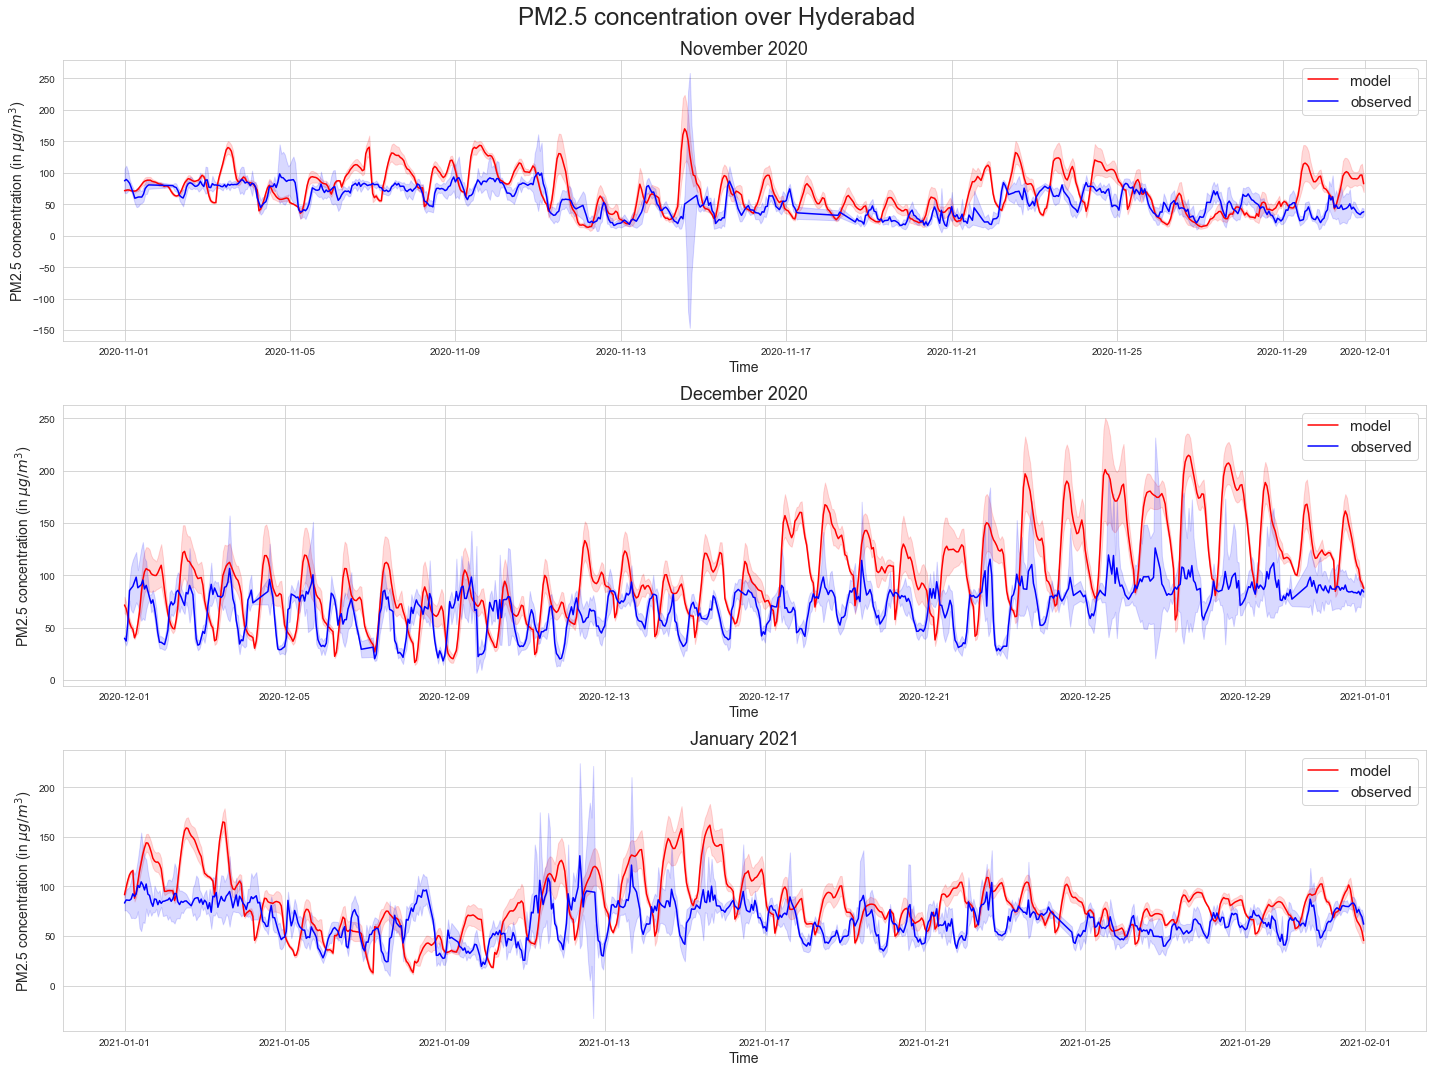

In [14]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM2.5'], yerr=dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM2.5'] + dfmod_nov['mod_PM2.5_stdev'], dfmod_nov['mod_PM2.5'] - dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM2.5'], yerr=dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM2.5'] + dfobs_nov['obs_PM2.5_stdev'], dfobs_nov['obs_PM2.5'] - dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_dec.index, dfmod_dec['mod_PM2.5'], yerr=dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM2.5'] + dfmod_dec['mod_PM2.5_stdev'], dfmod_dec['mod_PM2.5'] - dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_dec.index, dfobs_dec['obs_PM2.5'], yerr=dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM2.5'] + dfobs_dec['obs_PM2.5_stdev'], dfobs_dec['obs_PM2.5'] - dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_jan.index, dfmod_jan['mod_PM2.5'], yerr=dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM2.5'] + dfmod_jan['mod_PM2.5_stdev'], dfmod_jan['mod_PM2.5'] - dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_jan.index, dfobs_jan['obs_PM2.5'], yerr=dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM2.5'] + dfobs_jan['obs_PM2.5_stdev'], dfobs_jan['obs_PM2.5'] - dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Hyderabad', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err.png')

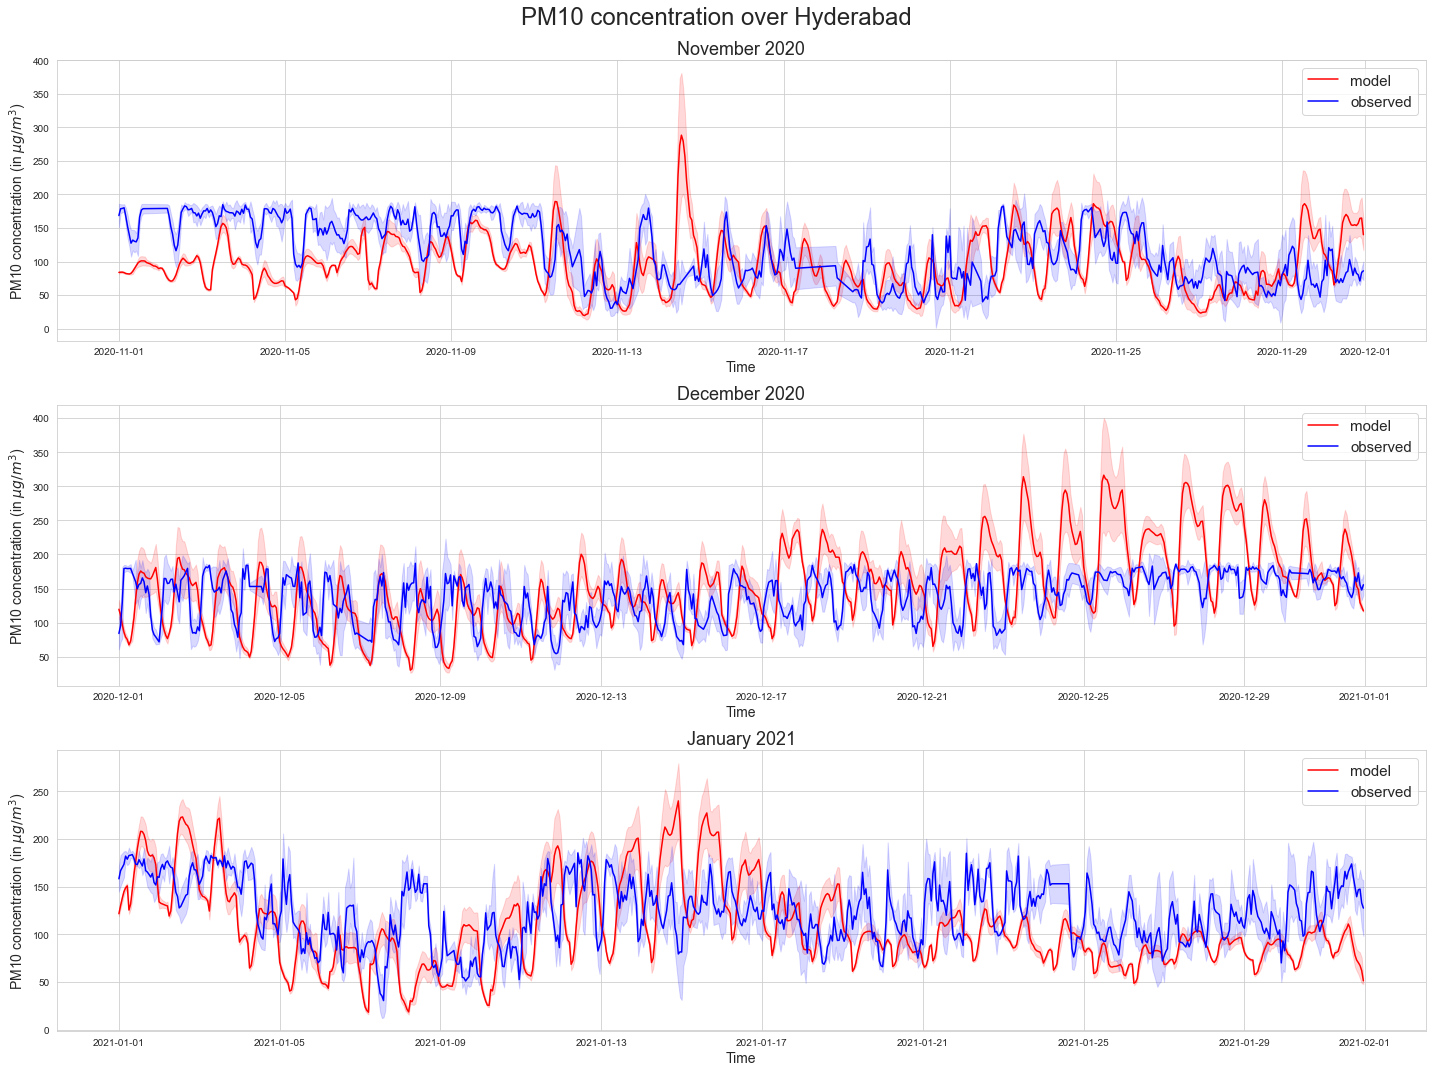

In [15]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM10'] + dfmod_nov['mod_PM10_stdev'], dfmod_nov['mod_PM10'] - dfmod_nov['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM10'] + dfobs_nov['obs_PM10_stdev'], dfobs_nov['obs_PM10'] - dfobs_nov['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM10'] + dfmod_dec['mod_PM10_stdev'], dfmod_dec['mod_PM10'] - dfmod_dec['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM10'] + dfobs_dec['obs_PM10_stdev'], dfobs_dec['obs_PM10'] - dfobs_dec['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM10'] + dfmod_jan['mod_PM10_stdev'], dfmod_jan['mod_PM10'] - dfmod_jan['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM10'] + dfobs_jan['obs_PM10_stdev'], dfobs_jan['obs_PM10'] - dfobs_jan['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Hyderabad', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err.png')

### Plot for diurnal variation

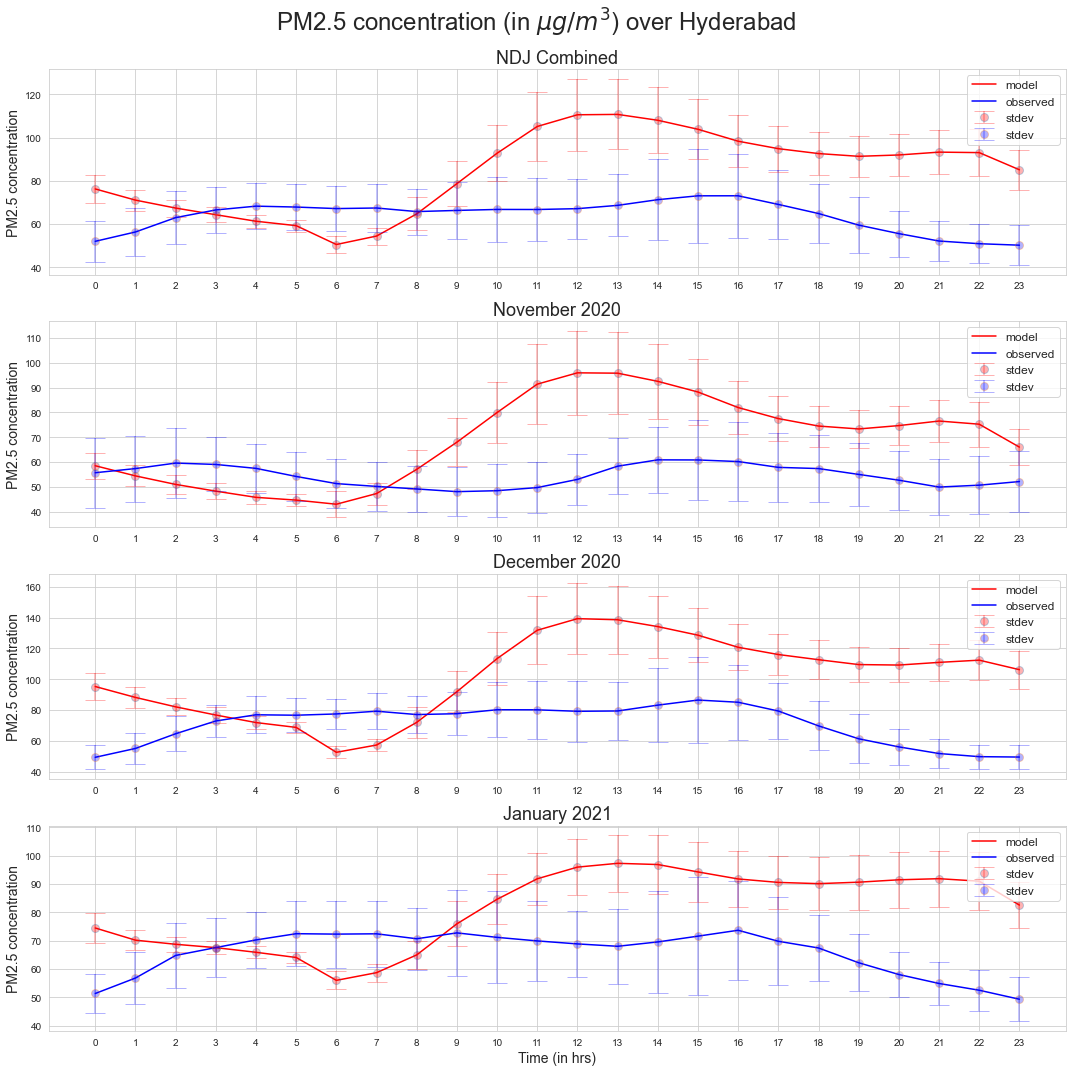

In [16]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration (in $\mu g/m^3$) over Hyderabad', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm25.png')

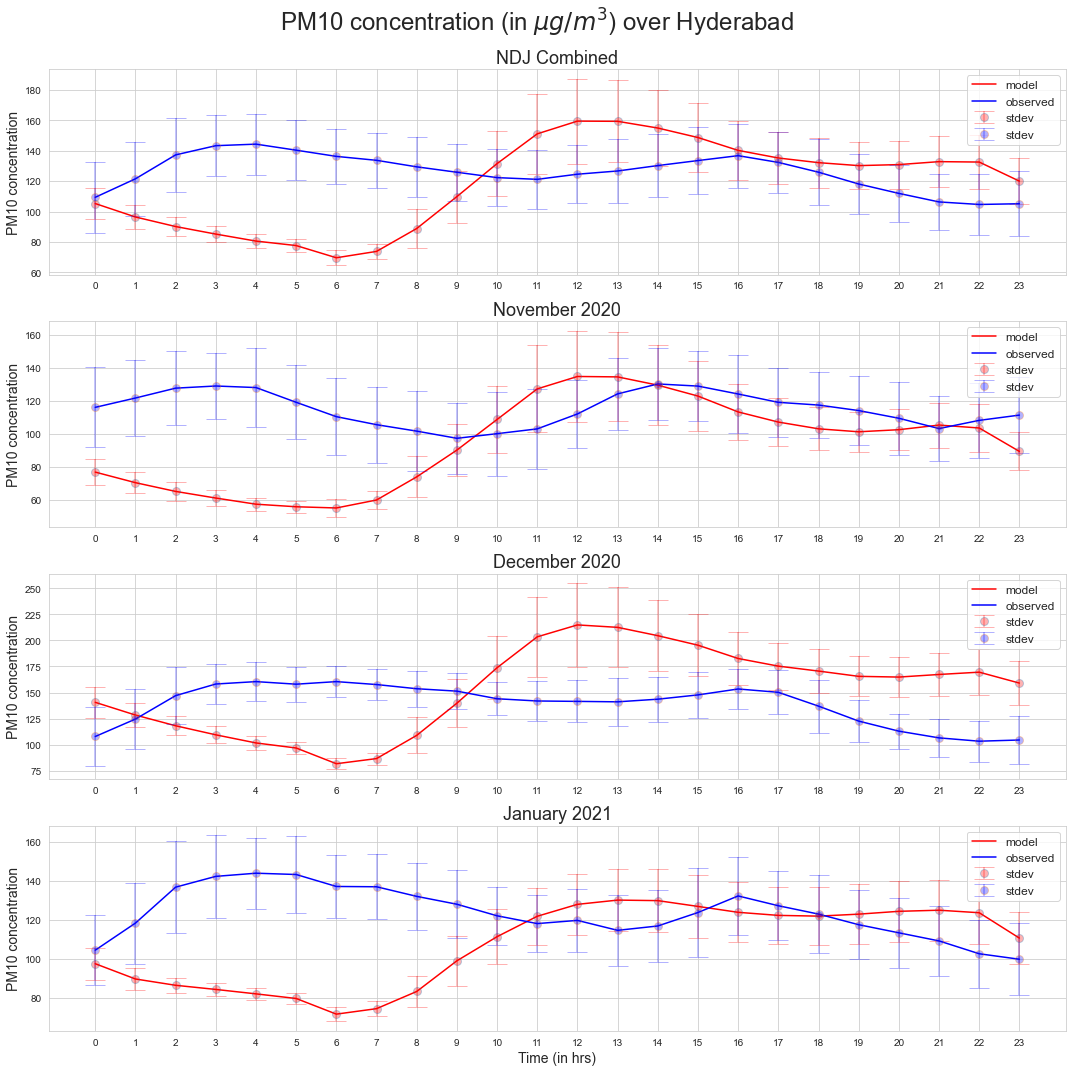

In [17]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration (in $\mu g/m^3$) over Hyderabad', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm10.png')

## Take the running average for the data

In [18]:
# redifing the dataframes

dfmod = pd.read_csv('data/hyderabad_mod.csv')
dfobs = pd.read_csv('data/hyderabad_obs.csv')

In [19]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [20]:
dfobs = dfobs.interpolate(method='time')
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

In [21]:
dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month
dfmod['time'] = dfmod.index.hour
dfobs['time'] = dfobs.index.hour

In [22]:
df = aqi_calc.get_aqi(dfmod, dfobs)

In [23]:
df.head()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:00:00,71.55,83.84,90.419583,4.416667,105.399583,5.414583,201.397212,103.563725,3,2,85.83,170.0,81.651458,8.790833,165.697917,13.696667,172.099356,143.360625,2,2
2020-11-01 01:00:00,72.27,84.13,89.764167,4.408333,104.604583,5.406250,199.114675,103.039025,2,2,86.50,174.8,81.908542,9.130000,165.614583,13.929167,172.955444,143.305625,2,2
2020-11-01 02:00:00,72.75,84.24,89.145000,4.427917,103.858333,5.423333,197.052850,102.546500,2,2,83.83,157.2,82.019375,9.771250,165.006250,14.443750,173.324519,142.904125,2,2
2020-11-01 03:00:00,72.30,83.54,88.505000,4.460417,103.106250,5.458333,194.921650,102.050125,2,2,84.50,155.2,82.123542,10.073333,164.572917,14.811667,173.671394,142.618125,2,2
2020-11-01 04:00:00,71.25,82.22,87.740833,4.465417,102.215833,5.461250,192.376975,101.462450,2,2,79.67,160.8,81.909792,10.121250,164.700000,15.144583,172.959606,142.702000,2,2


In [24]:
df.shape

(2208, 20)

### Critical PM2.5 and PM10 skill scores combine

In [25]:
score_calc.get_critical_score(df)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([2208, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([2208, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


### Very unhealthy PM2.5 and PM10 skill scores combined

In [26]:
score_calc.get_veryunhealthy_score(df)

Key25 is :  ['b', 'd']
The list25 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
val25 is :  dict_values([300, 1908, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([2208, 0, 0, 0])
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  86.41304347826086
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  86.41304347826086
POFD =  13.586956521739129
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


### Unhealthy PM2.5 and PM10 skill scores combined

In [27]:
score_calc.get_unhealthy_score(df)

Key25 is :  ['a', 'b', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
val25 is :  dict_values([69, 698, 1441, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([2208, 0, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  68.38768115942028
FAR =  91.0039113428944
POD =  100.0
CSI =  8.996088657105608
FOM =  0.0
FOH =  8.996088657105608
PON =  67.36792893875642
POFD =  32.63207106124357
DFR =  0.0
FOCN =  100.0
TSS =  0.6736792893875643
Heidke =  0.11428344833055754 

ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


### Statistical performance combined

In [28]:
stat_calc.get_stat_performance(df, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  20.42274871678745
mean bias pm10 =  -7.70924894323675
mean bias aqi_pm2.5 =  58.30105348310438
mean bias aqi_pm10 =  -6.611089552148692 

fractional bias is :
fractional bias pm2.5 =  0.2758079670620552
fractional bias pm10 =  -0.0631080139829267
fractional bias aqi_pm2.5 =  0.38855186376031026
fractional bias aqi_pm10 =  -0.05869306556091512 

Correlation coefficient is :
corr coeff pm2.5 =  0.778242060698783  and p-value is =  0.0
corr coeff pm10 =  0.5853573086717356  and p-value is =  3.14040199243702e-203
corr coeff aqi_pm2.5 =  0.802277758674927  and p-value is =  0.0
corr coeff aqi_pm10 =  0.5993688638218733 
  and p-value is =  1.7170900335418636e-215
RMSE is :
RMSE pm2.5 =  28.195521441785704
RMSE pm10 =  35.85240633871422
RMSE aqi_pm2.5 =  77.60516448122502
RMSE aqi_pm10 =  26.251247420794584 

NMSE is :
NMSE pm2.5 =  0.14780333454042438
NMSE pm10 =  0.08622121315872663
NMSE aqi_pm2.5 =  0.2779939975004527
NMSE aqi_pm10 =  0.05436277044239728 



## Doing the same critical PM2.5 and PM10 skill score for different winter months and also finding the statistical performance

## Extracting the various months

In [29]:
# Extracting the separate values for the winter months separately
dfnov = df.loc['2020-11-01':'2020-11-30']
dfdec = df.loc['2020-12-01':'2020-12-31']
dfjan = df.loc['2021-01-01':'2021-01-31']

### PM2.5 and PM10 scores for separate months

#### November

In [30]:
score_calc.get_critical_score(dfnov)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([720, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([720, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [31]:
score_calc.get_veryunhealthy_score(dfnov)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([720, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([720, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [32]:
score_calc.get_unhealthy_score(dfnov)

Key25 is :  ['b', 'd']
The list25 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
val25 is :  dict_values([146, 574, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([720, 0, 0, 0])
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  79.72222222222223
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  79.72222222222223
POFD =  20.27777777777778
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [33]:
stat_calc.get_stat_performance(dfnov, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  13.73296817129629
mean bias pm10 =  -24.068908564814844
mean bias aqi_pm2.5 =  37.974955592206776
mean bias aqi_pm10 =  -17.672762537468948 

fractional bias is :
fractional bias pm2.5 =  0.22007151652009066
fractional bias pm10 =  -0.22880856630109128
fractional bias aqi_pm2.5 =  0.3112287774409091
fractional bias aqi_pm10 =  -0.17762244338118627 

Correlation coefficient is :
corr coeff pm2.5 =  0.7478591294161291  and p-value is =  7.065879882591777e-130
corr coeff pm10 =  0.4179066807554223  and p-value is =  8.38873668196319e-32
corr coeff aqi_pm2.5 =  0.7568870287682893  and p-value is =  9.170718164605765e-135
corr coeff aqi_pm10 =  0.4694528264498569 
  and p-value is =  9.656552622796388e-41
RMSE is :
RMSE pm2.5 =  20.555049419320152
RMSE pm10 =  42.458701741598134
RMSE aqi_pm2.5 =  56.487088934322095
RMSE aqi_pm10 =  31.646106241230267 

NMSE is :
NMSE pm2.5 =  0.10983136204797318
NMSE pm10 =  0.16507712887747025
NMSE aqi_pm2.5 =  0.219639055370

#### December

In [34]:
score_calc.get_critical_score(dfdec)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([744, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [35]:
score_calc.get_veryunhealthy_score(dfdec)

Key25 is :  ['b', 'd']
The list25 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
val25 is :  dict_values([243, 501, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  67.33870967741935
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  67.33870967741935
POFD =  32.66129032258064
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [36]:
score_calc.get_unhealthy_score(dfdec)

Key25 is :  ['a', 'b', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
val25 is :  dict_values([52, 345, 347, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  53.62903225806451
FAR =  86.90176322418137
POD =  100.0
CSI =  13.09823677581864
FOM =  0.0
FOH =  13.09823677581864
PON =  50.144508670520224
POFD =  49.85549132947977
DFR =  0.0
FOCN =  100.0
TSS =  0.5014450867052023
Heidke =  0.12326483768717893 

ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [37]:
stat_calc.get_stat_performance(dfdec, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  31.50514504928315
mean bias pm10 =  15.679113463261626
mean bias aqi_pm2.5 =  85.87706171949667
mean bias aqi_pm10 =  10.337066918682797 

fractional bias is :
fractional bias pm2.5 =  0.3686753274569346
fractional bias pm10 =  0.10831275889180939
fractional bias aqi_pm2.5 =  0.4831826050394769
fractional bias aqi_pm10 =  0.07986249545032041 

Correlation coefficient is :
corr coeff pm2.5 =  0.8290084715770201  and p-value is =  1.8338892078700463e-189
corr coeff pm10 =  0.744420341187428  and p-value is =  2.7487235707717194e-132
corr coeff aqi_pm2.5 =  0.8055005362680374  and p-value is =  8.844182896861615e-171
corr coeff aqi_pm10 =  0.7337996404580787 
  and p-value is =  1.0507878562306014e-126
RMSE is :
RMSE pm2.5 =  38.21903079998644
RMSE pm10 =  33.92471149593711
RMSE aqi_pm2.5 =  100.71410674489712
RMSE aqi_pm10 =  22.611293552671004 

NMSE is :
NMSE pm2.5 =  0.20706112622952058
NMSE pm10 =  0.05508383593004924
NMSE aqi_pm2.5 =  0.341009809845122

#### January

In [38]:
score_calc.get_critical_score(dfjan)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([744, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [39]:
score_calc.get_veryunhealthy_score(dfjan)

Key25 is :  ['b', 'd']
The list25 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
val25 is :  dict_values([57, 687, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  92.33870967741935
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  92.33870967741935
POFD =  7.661290322580645
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [40]:
score_calc.get_unhealthy_score(dfjan)

Key25 is :  ['a', 'b', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
val25 is :  dict_values([17, 207, 520, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  72.17741935483872
FAR =  92.41071428571429
POD =  100.0
CSI =  7.5892857142857135
FOM =  0.0
FOH =  7.5892857142857135
PON =  71.52682255845943
POFD =  28.473177441540575
DFR =  0.0
FOCN =  100.0
TSS =  0.7152682255845942
Heidke =  0.10297749405899073 

ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [41]:
stat_calc.get_stat_performance(dfjan, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  15.81433355734769
mean bias pm10 =  -15.265682683691779
mean bias aqi_pm2.5 =  50.39546256048388
mean bias aqi_pm10 =  -12.854401198476708 

fractional bias is :
fractional bias pm2.5 =  0.21397311556618429
fractional bias pm10 =  -0.13162190749797115
fractional bias aqi_pm2.5 =  0.33711919681469216
fractional bias aqi_pm10 =  -0.11840930248372891 

Correlation coefficient is :
corr coeff pm2.5 =  0.7764737380705624  and p-value is =  5.798119242828654e-151
corr coeff pm10 =  0.6589053509765006  and p-value is =  7.896199328814532e-94
corr coeff aqi_pm2.5 =  0.8096293778789169  and p-value is =  7.166856687969415e-174
corr coeff aqi_pm10 =  0.6512116695572574 
  and p-value is =  5.589621769626077e-91
RMSE is :
RMSE pm2.5 =  22.130126910635365
RMSE pm10 =  30.319074984505313
RMSE aqi_pm2.5 =  68.13380011802575
RMSE aqi_pm10 =  23.763692486771706 

NMSE is :
NMSE pm2.5 =  0.09069515694050279
NMSE pm10 =  0.06863424228093008
NMSE aqi_pm2.5 =  0.213809662865

## Plots with running average instead

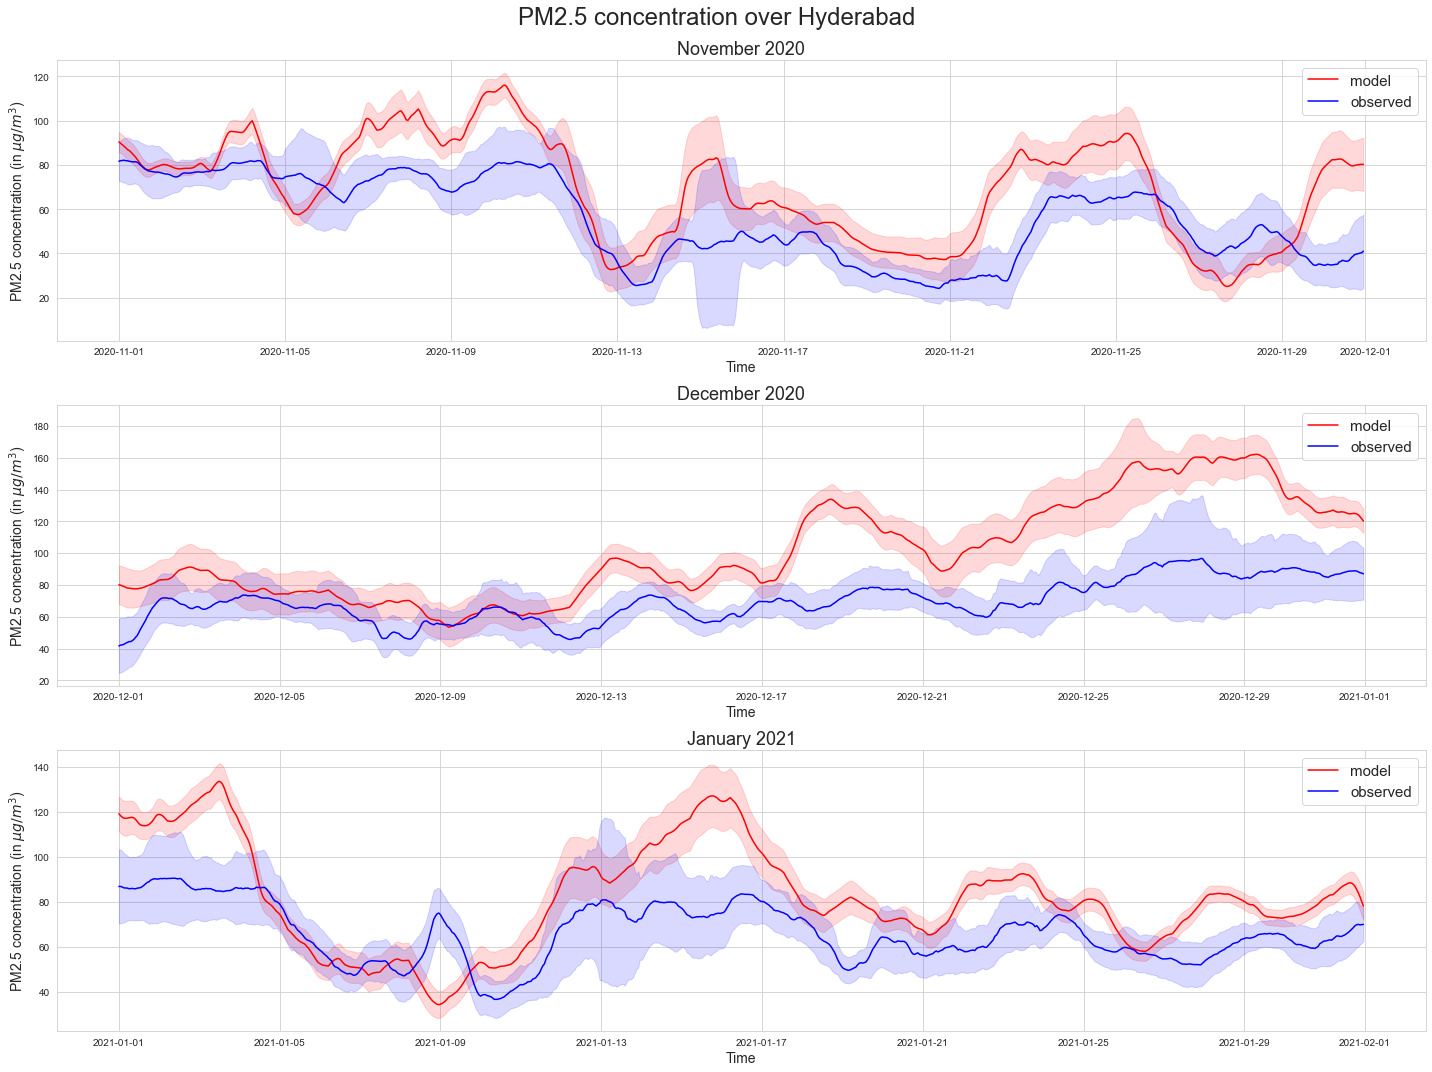

In [77]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_pm2'], yerr=dfmod_nov['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm2'] + dfnov['mod_pm2_stdev'], dfnov['mod_pm2'] - dfnov['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_pm2'], yerr=dfobs_nov['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm2'] + dfnov['obs_pm2_stdev'], dfnov['obs_pm2'] - dfnov['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfdec.index, dfdec['mod_pm2'], yerr=dfdec['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm2'] + dfdec['mod_pm2_stdev'], dfdec['mod_pm2'] - dfdec['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfdec.index, dfdec['obs_pm2'], yerr=dfdec['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm2'] + dfdec['obs_pm2_stdev'], dfdec['obs_pm2'] - dfdec['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfjan.index, dfjan['mod_pm2'], yerr=dfjan['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm2'] + dfjan['mod_pm2_stdev'], dfjan['mod_pm2'] - dfjan['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfjan.index, dfjan['obs_pm2'], yerr=dfjan['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm2'] + dfjan['obs_pm2_stdev'], dfjan['obs_pm2'] - dfjan['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Hyderabad', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err_running.png')

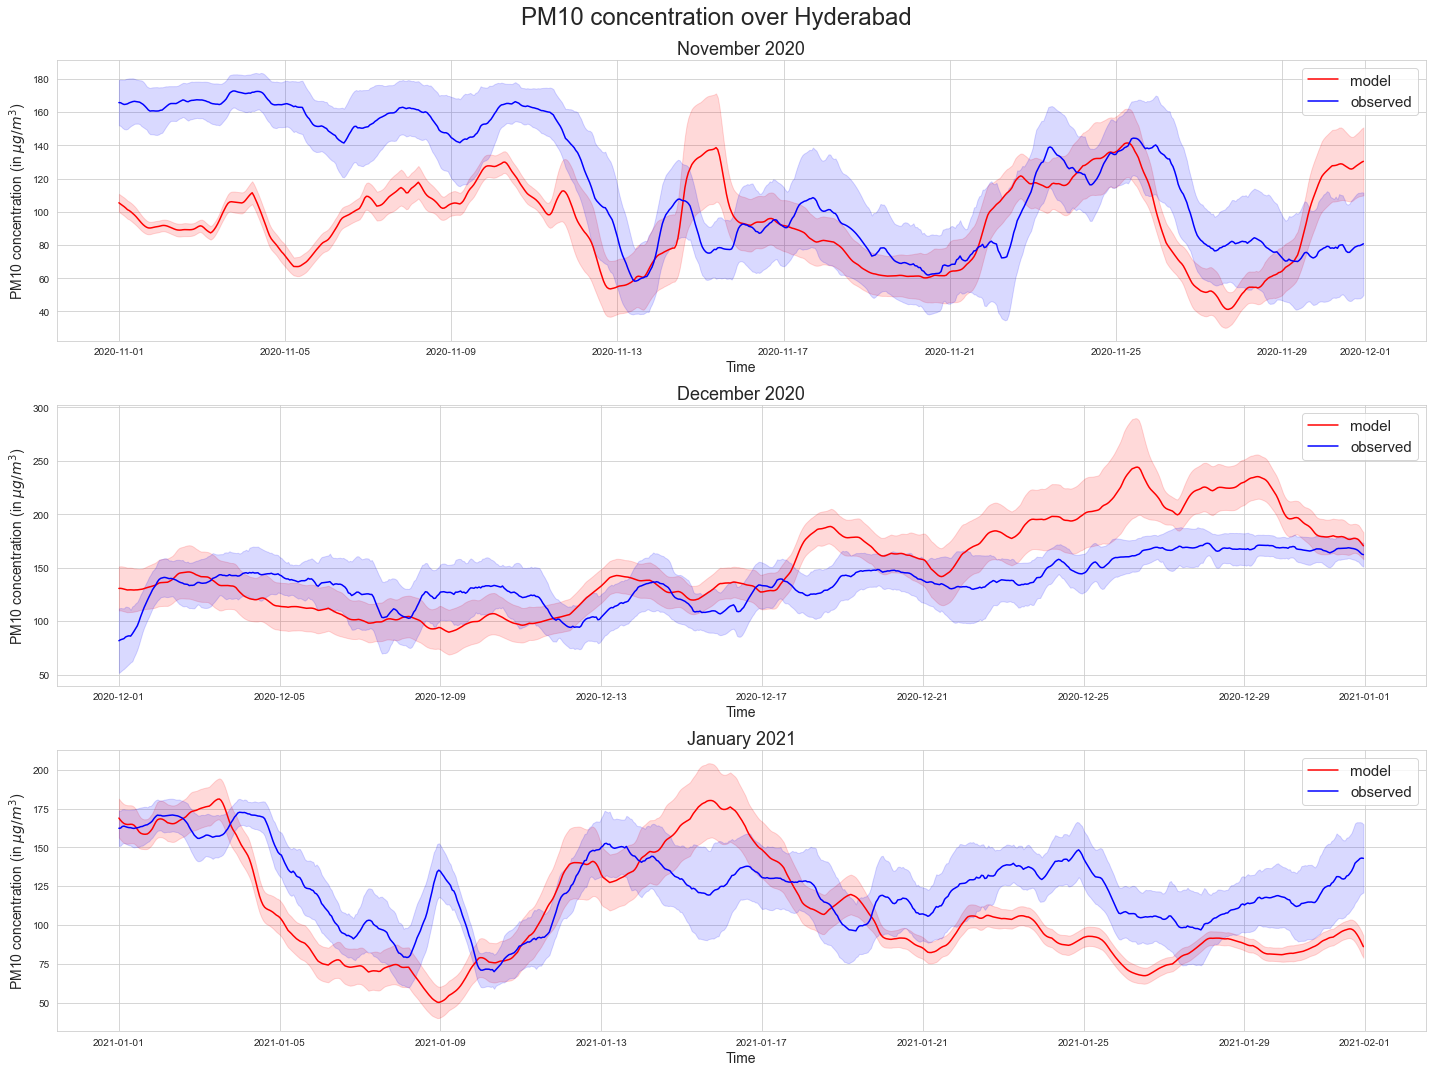

In [78]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm10'] + dfnov['mod_pm10_stdev'], dfnov['mod_pm10'] - dfnov['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm10'] + dfnov['obs_pm10_stdev'], dfnov['obs_pm10'] - dfnov['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm10'] + dfdec['mod_pm10_stdev'], dfdec['mod_pm10'] - dfdec['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm10'] + dfdec['obs_pm10_stdev'], dfdec['obs_pm10'] - dfdec['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm10'] + dfjan['mod_pm10_stdev'], dfjan['mod_pm10'] - dfjan['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm10'] + dfjan['obs_pm10_stdev'], dfjan['obs_pm10'] - dfjan['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Hyderabad', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err_running.png')

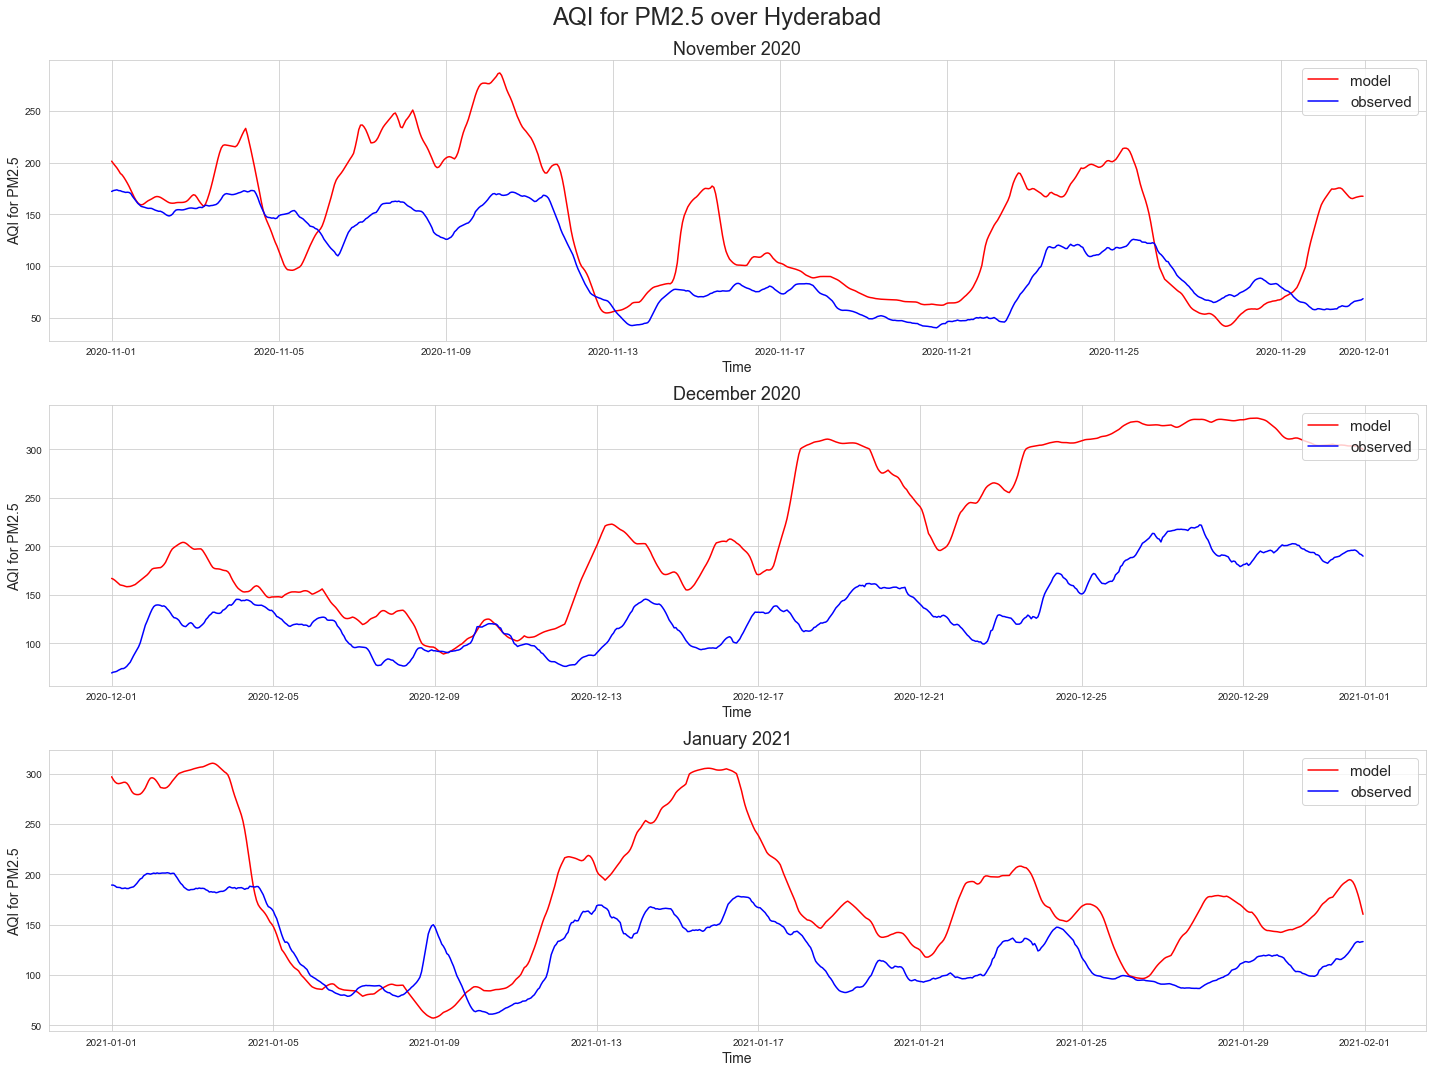

In [79]:
# Plot of AQI_PM2.5 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM2.5 over Hyderabad', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm25_ts.png')

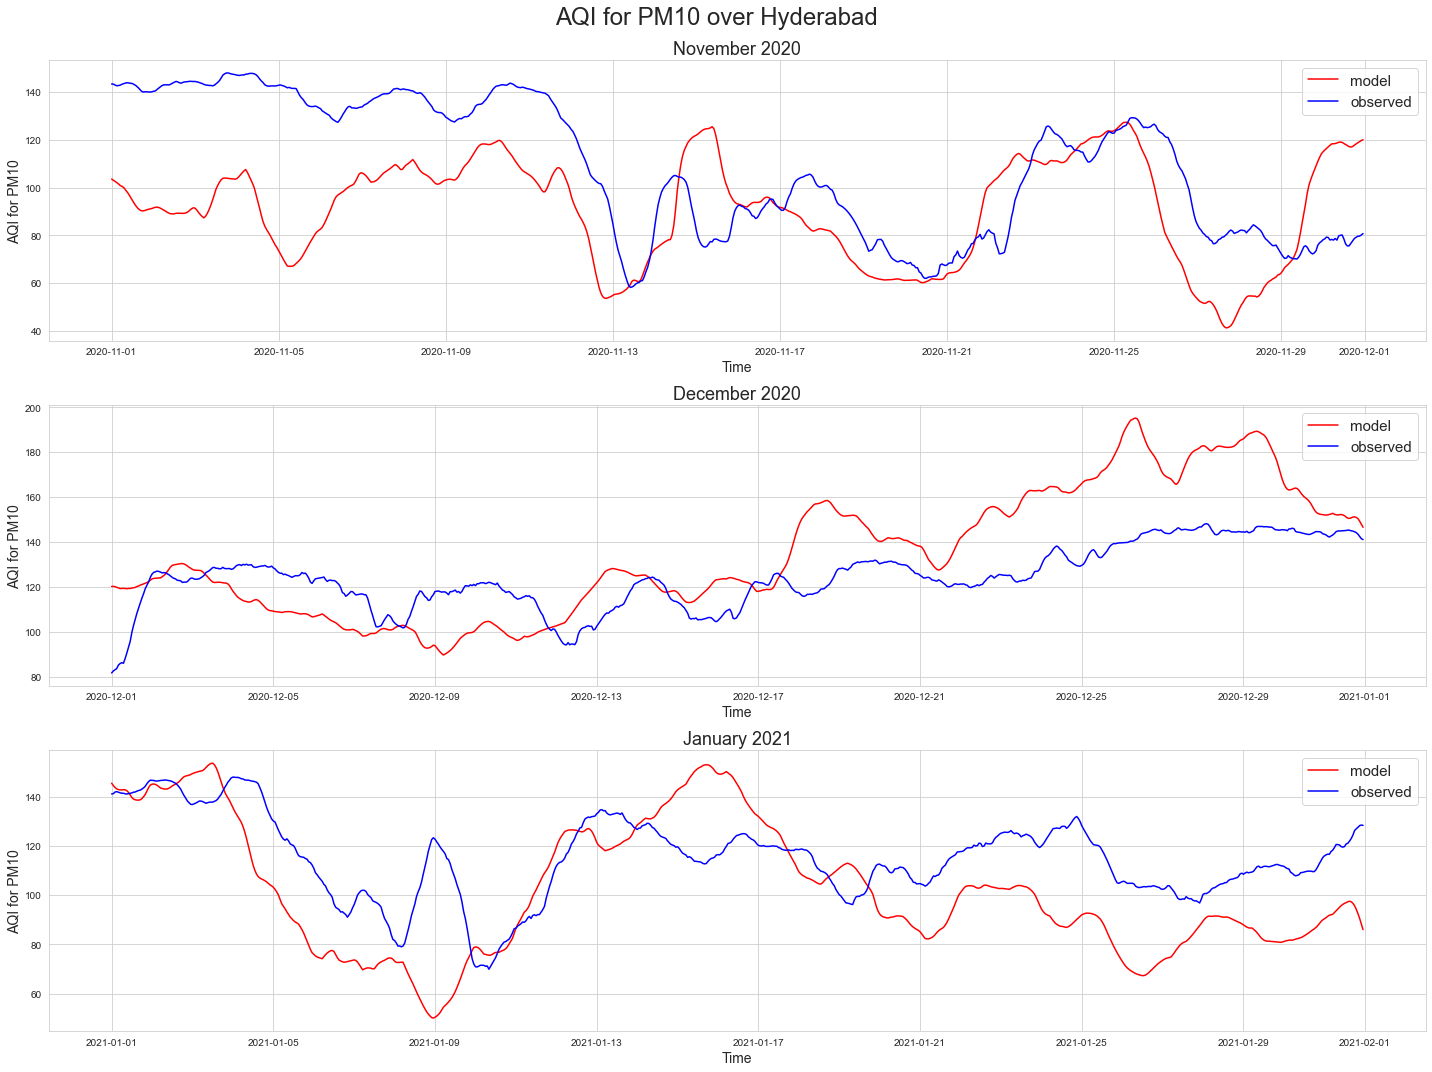

In [80]:
# Plot of AQI_PM10 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM10 over Hyderabad', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm10_ts.png')